<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/SimpleImageProcessing_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2.2 Google Colab - Simple_ImgProcessing**

**Equipo 10:**
* Carlos Roberto Torres Ferguson A01215432
* Andrea Carolina Treviño Garza A01034993
* Julio Adrián Quintana Gracia A01793661
* Pablo Alejandro Colunga Vázquez A01793671

In [1]:
#Cargar librerías:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

**1.   Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.**




**2.   Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.**



  * De acuerdo con The AI Learner (s.f.), para transformar una imagen a negativo se utiliza la formula siguiente:
**s = T(r) = L-1-r**

  * Donde L-1 es el valor máximo de la intensidad del pixel y r los valores originales de los pixeles de la imagen.

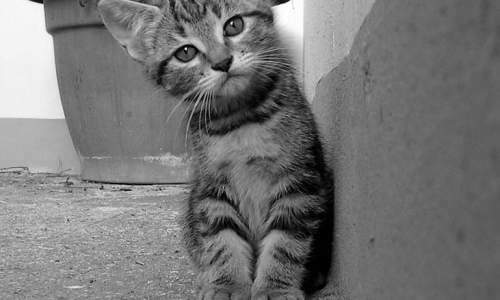

In [3]:
url = "https://placekitten.com/500/300"
myImg = io.imread(url)
myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv2_imshow(myGrayImg)

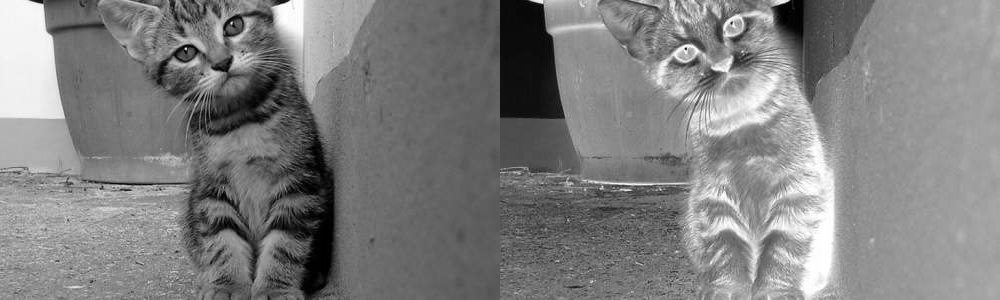

In [4]:
negImg = 255 - myGrayImg
final_frame = cv.hconcat((myGrayImg, negImg))
cv2_imshow(final_frame)

**3.   Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.**



  * De acuerdo con Lindevs (2022), `Gamma correction` es un método que permite controlar el brillo de una imagen. La fórmula está dada por: <br/><br/> 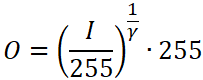

Donde:
* `I` es el valor del pixel de entrada [0,255].
* `O` es el valor del pixel de salida [0,255].
* `γ` es el valor gamma que controla el brillo. Si gamma es <1 entonces la imagen será más obscura; por el contrario, si la gamma es >1 entonces la imagen tendrá más brillo. Igualmente, un gamma =1 no tiene ningún efecto sobre la imagen.

  * El algoritmo convierte los valores originales de los pixels del rango [0, 255] a una escala de [0, 1.0]. Después, de la aplicación de los cálculos, los valores son regresados a una escala de [0, 255]. En este caso se utiliza una `lookup table (LUT)`, que provee la función `LUT` de la librería OpenCV, para mapear los valores de los pixeles de entrada con los valores de los pixeles de salida (Lindevs, 2022).

In [5]:
# Implementación de Gamma Correction. Fuente: Lindevs
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)

* Gamma con valor menor a 1, en este caso 0.5, produce una image con menos brillo.

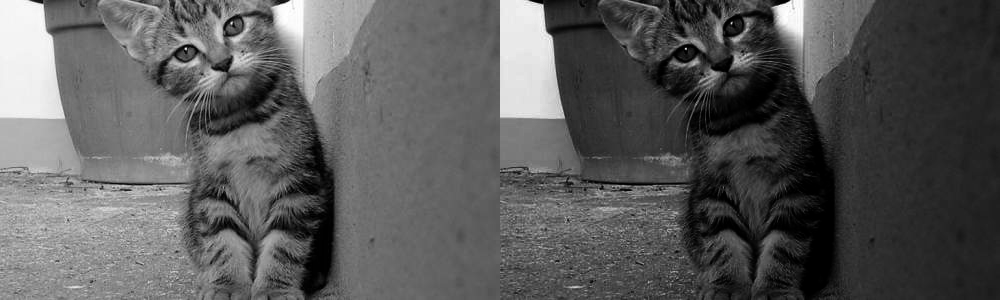

In [6]:
gammaImg1 = gammaCorrection(myGrayImg, 0.5)
final_frame = cv.hconcat((myGrayImg, gammaImg1))
cv2_imshow(final_frame)

  * Gamma con valor mayor a 1, en este caso 2, produce una image con más brillo.

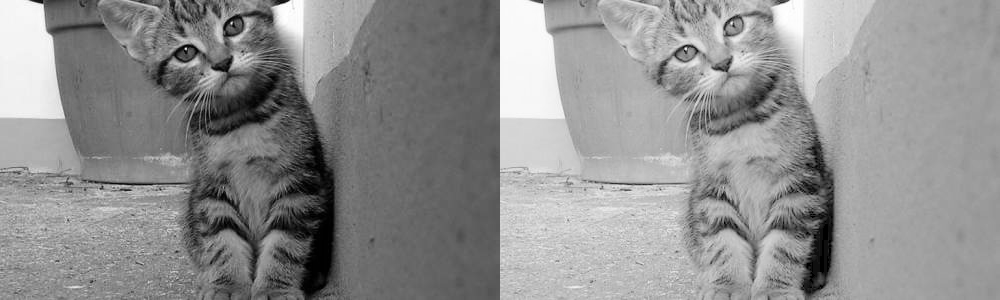

In [7]:
gammaImg2 = gammaCorrection(myGrayImg, 2)
final_frame = cv.hconcat((myGrayImg, gammaImg2))
cv2_imshow(final_frame)

  * Gamma con valor igual a 1 no genera ningún cambio en el brillo de la imagen.

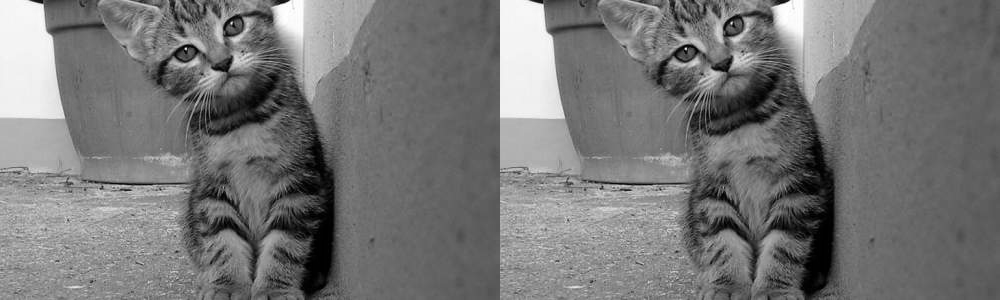

In [8]:
gammaImg3 = gammaCorrection(myGrayImg, 1)
final_frame = cv.hconcat((myGrayImg, gammaImg3))
cv2_imshow(final_frame)

**4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.**

  * La sustracción de imágenes es una operación aritmética pixel a pixel permite obtener la diferencia en los valores de los pixeles entre múltiples imágenes. Esto tiene múltiples aplicaciones como: remover el fondo de una imagen y convertirla a formato PNG, detectar las diferencias entre dos imágenes e incluso para la creación de filtros para retocar fotografías (Geeks for Geeks, 2023).

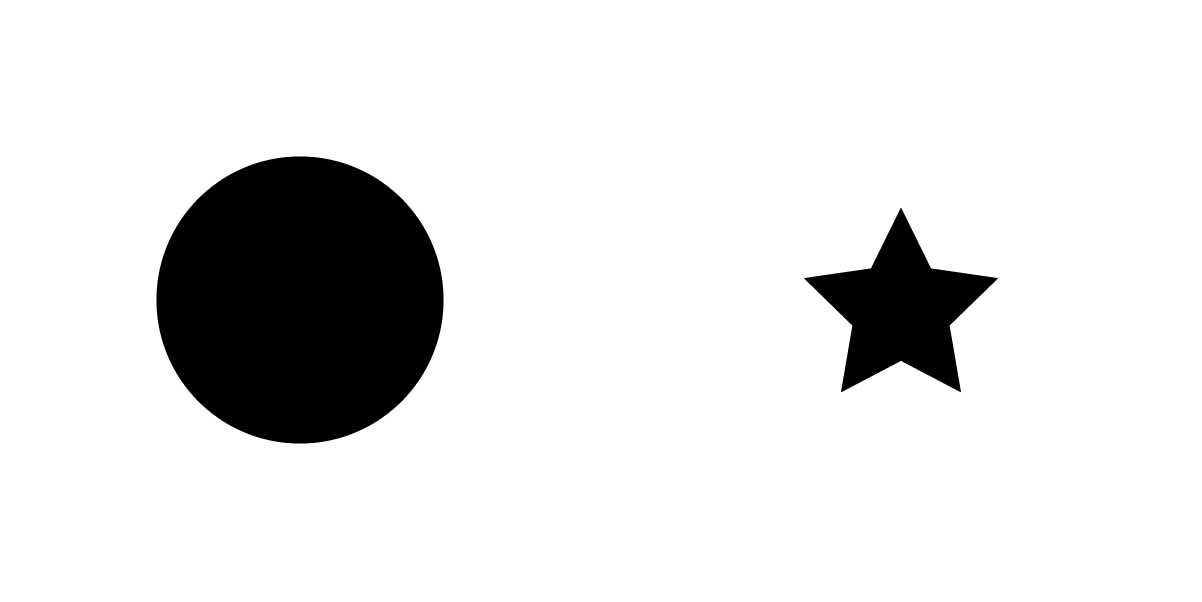

In [9]:
# Fuente: Geeks For Geeks
# Sitio web: https://www.geeksforgeeks.org/how-to-subtract-two-images-using-python-opencv/
circleUrl = "https://media.geeksforgeeks.org/wp-content/uploads/20211001165734/circle.png"
starUrl = "https://media.geeksforgeeks.org/wp-content/uploads/20211001165739/star.png"
circle = io.imread(circleUrl)  
star = io.imread(starUrl)
final_frame = cv.hconcat((circle, star))
cv2_imshow(final_frame)

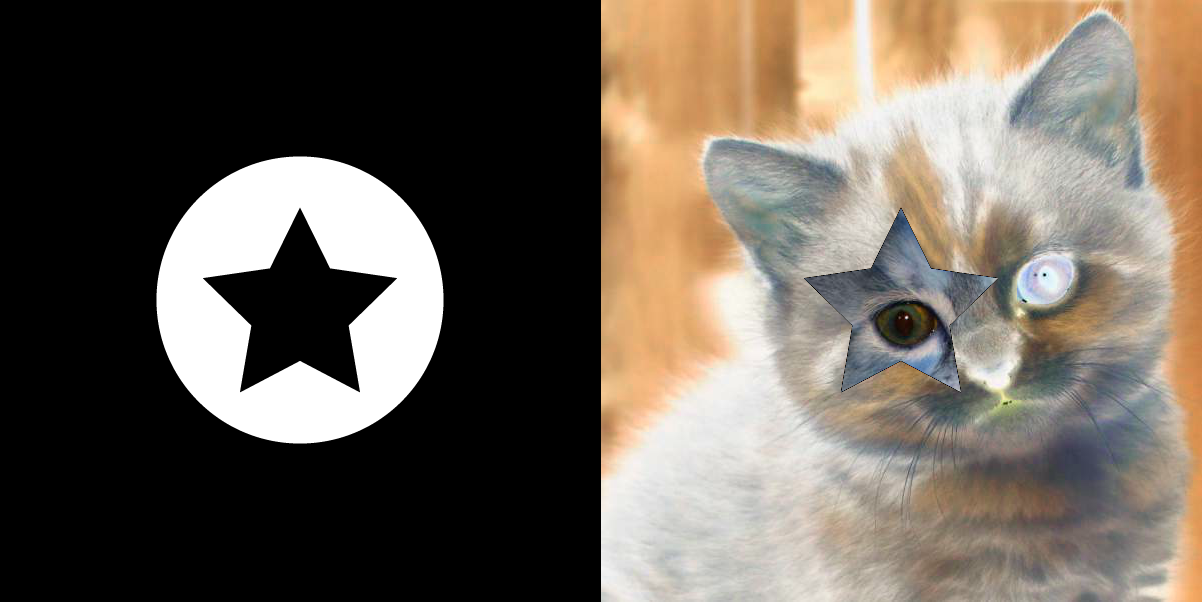

In [18]:
# Remover canal 4 de imagenes 
# Fuente: https://stackoverflow.com/questions/36872379/how-to-remove-4th-channel-from-png-images
star = cv.cvtColor(star, cv.COLOR_BGRA2BGR)
circle = cv.cvtColor(circle, cv.COLOR_BGRA2BGR)

# Sustraer dos imágenes
# Fuente: https://stackoverflow.com/a/60291256
subtracted = cv.absdiff(circle, star)

newCatImg = io.imread('https://placekitten.com/601/602')

subtracted2 = cv.absdiff(newCatImg, star)
final_frame = cv.hconcat((subtracted, subtracted2))
cv2_imshow(final_frame)